<a href="https://colab.research.google.com/github/kylemcdonald/ml-examples/blob/master/workshop/cloud_to_grid/Cloud%20To%20Grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's start by installing an additional library we will need.

In [0]:
!pip install --quiet lap MulticoreTSNE

And importing the libraries we will use.

In [0]:
import numpy as np
from sklearn import manifold
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import lap

Now we create 1024 3d points. 

In [0]:
side = 32
totalDataPoints = side * side
data3d = np.random.uniform(low=0.0, high=1.0, size=(totalDataPoints, 3))

And use t-SNE to create a 2d embedding.

In [4]:
from MulticoreTSNE import MulticoreTSNE as TSNE 
tsne = TSNE(n_components=2)
%time data2d = tsne.fit_transform(np.copy(data3d))

CPU times: user 2.5 s, sys: 7.13 ms, total: 2.51 s
Wall time: 2.51 s


The output of t-SNE is not normalized, so we do that now. This isn't strictly necessary, but makes it easier to visualize the results of the assignment solution.

In [0]:
data2d -= data2d.min(axis=0)
data2d /= data2d.max(axis=0)

Let's plot the data using the 3d points as colors and 2d points for position.

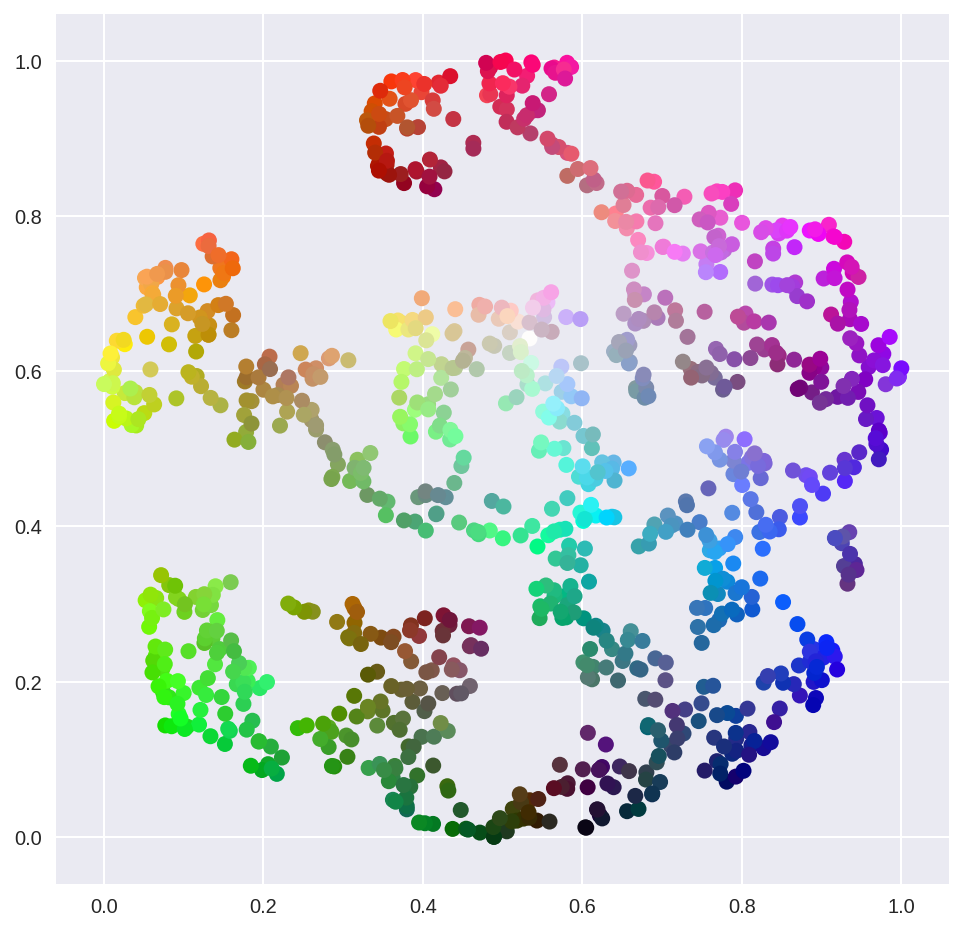

In [6]:
plt.figure(figsize=(8, 8))
plt.scatter(data2d[:,0], data2d[:,1], c=data3d, edgecolors='none', marker='o', s=64)  
plt.show()

Now let's make a list of grid points that we want to map our data onto.

In [0]:
xv, yv = np.meshgrid(np.linspace(0, 1, side), np.linspace(0, 1, side))
grid = np.dstack((xv, yv)).reshape(-1, 2)

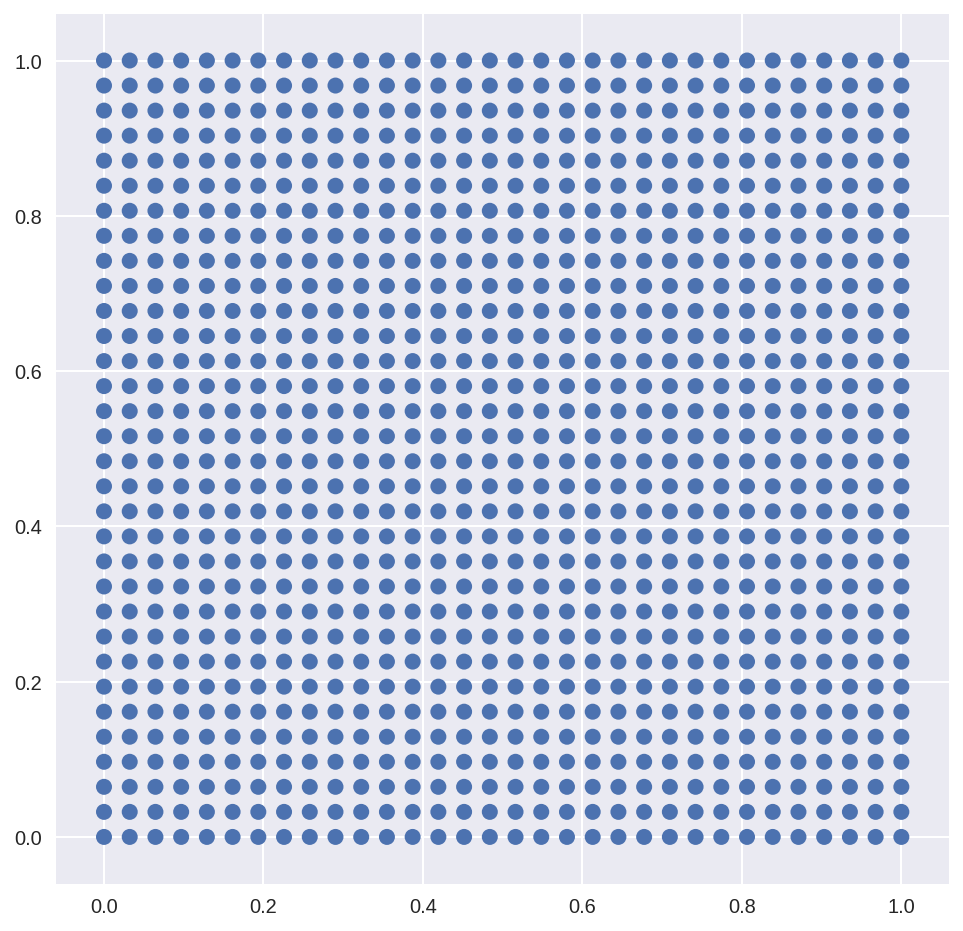

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(grid[:,0], grid[:,1], edgecolors='none', marker='o', s=64)
plt.show()

Now we have two sets of 2d points.

In [9]:
print(grid.shape)
print(data2d.shape)

(1024, 2)
(1024, 2)


We evaluate a cost function that defines $n^2$ distances between the points. I like the results from the squared euclidean distance best.

CPU times: user 7.31 ms, sys: 4.9 ms, total: 12.2 ms
Wall time: 13 ms


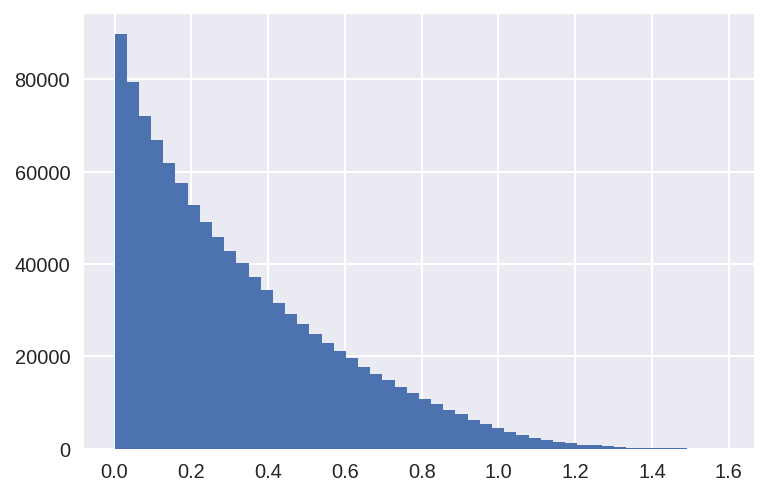

In [10]:
from scipy.spatial.distance import cdist
%time cost = cdist(grid, data2d, 'sqeuclidean')
plt.hist(cost.flatten(), bins=50)
plt.show()

Let's run the assignment problem solver.

Help on package lap:

NAME
    lap

DESCRIPTION
    LAP
    ``lap`` is a linear assignment problem solver using Jonker-Volgenant
    algorithm for dense (LAPJV) or sparse (LAPMOD) matrices.
    
    Functions
    ---------
    
    lapjv
        Find optimal (minimum-cost) assignment for a dense cost matrix.
    lapmod
        Find optimal (minimum-cost) assignment for a sparse cost matrix.

PACKAGE CONTENTS
    _lapjv
    lapmod
    tests (package)

FUNCTIONS
    lapjv(...)
        Solve linear assignment problem using Jonker-Volgenant algorithm.
        
        cost: an N x N matrix containing the assignment costs. Entry cost[i, j] is
          the cost of assigning row i to column j.
        extend_cost: whether or not extend a non-square matrix [default: False]
        cost_limit: an upper limit for a cost of a single assignment
                    [default: np.inf]
        return_cost: whether or not to return the assignment cost
        
        Returns (opt, x, y) where:
      

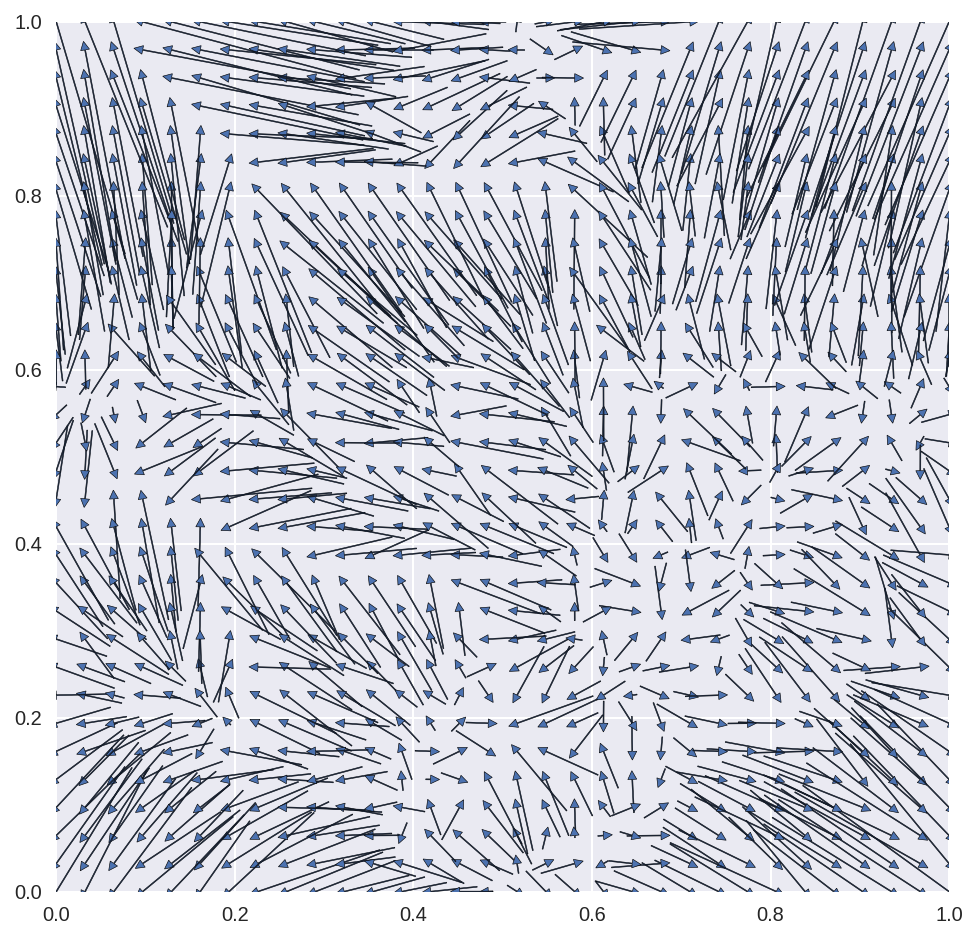

In [11]:
help('lap')
from lap import lapjv
%time min_cost, row_assigns, col_assigns = lapjv(cost, cost_limit=cost.max())
grid_jv = grid[col_assigns[:totalDataPoints]]
plt.figure(figsize=(8, 8))
for start, end in zip(data2d, grid_jv):
    plt.arrow(start[0], start[1], end[0] - start[0], end[1] - start[1],
              head_length=0.01, head_width=0.01)
plt.show()

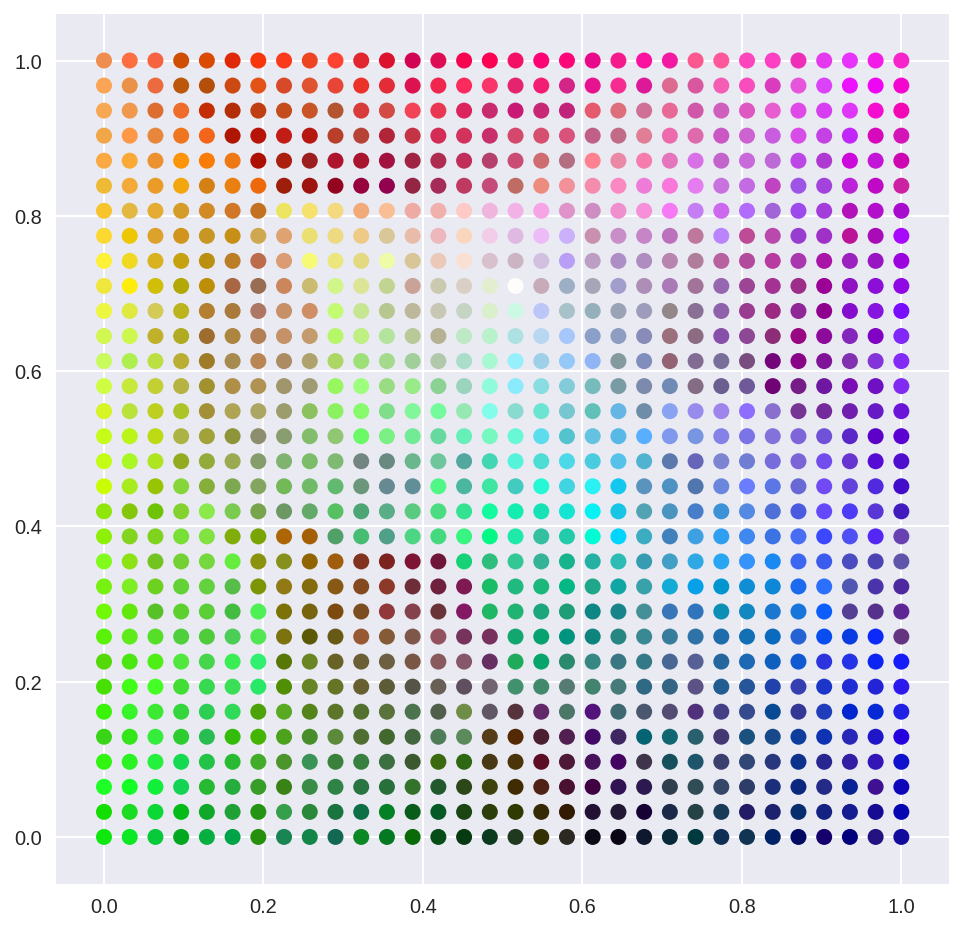

In [12]:
plt.figure(figsize=(8, 8))
plt.scatter(grid_jv[:,0], grid_jv[:,1], c=data3d, edgecolors='none', marker='o', s=64)  
plt.show()